# Technique: 06 Clustering Concepts and Similarity

### What is this?
Clustering means putting data into groups (subsets). Objects in the same group are **similar** to each other. Objects in different groups are **dissimilar** (different).

### Why use it?
1. To find hidden patterns in data.
2. To find "outliers" (data points that do not fit in any group).
3. To understand the "distance" between different data points.

### Key Terms:
* **Similarity**: Larger numbers mean objects are more alike.
* **Dissimilarity (Distance)**: Larger numbers mean objects are less alike (further apart).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245


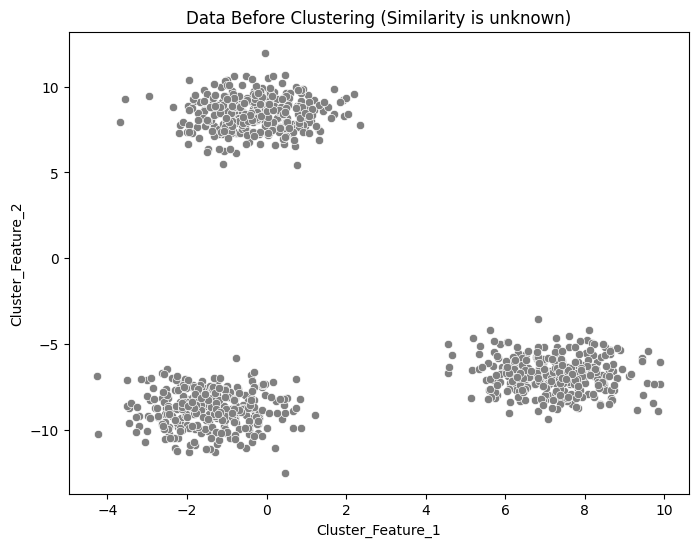

In [2]:
cluster_data = df[['Cluster_Feature_1', 'Cluster_Feature_2']]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cluster_Feature_1', y='Cluster_Feature_2', data=df, color='gray')
plt.title("Data Before Clustering (Similarity is unknown)")
plt.show()

## Measuring Similarity
To put objects together, the computer calculates the **Distance**. 

If the distance between Person A and Person B is small, they are in the same cluster. 

If the distance is large, they are dissimilar.

In [3]:
from sklearn.cluster import KMeans

# 1. Create the KMeans tool
# We use GLOBAL_SEED so the groups are the same every time
kmeans = KMeans(n_clusters=3, random_state=GLOBAL_SEED)

# 2. Find the clusters
df['Cluster_Label'] = kmeans.fit_transform(cluster_data).argmax(axis=1) 
# Note: we can also use kmeans.fit_predict(cluster_data)

# 3. Check the results
print("How many points in each cluster?")
print(df['Cluster_Label'].value_counts())

How many points in each cluster?
Cluster_Label
1    667
0    242
2     91
Name: count, dtype: int64


## Visualizing Clusters
Now we use different colors for each group. 

This shows us which points the computer thinks are "similar."

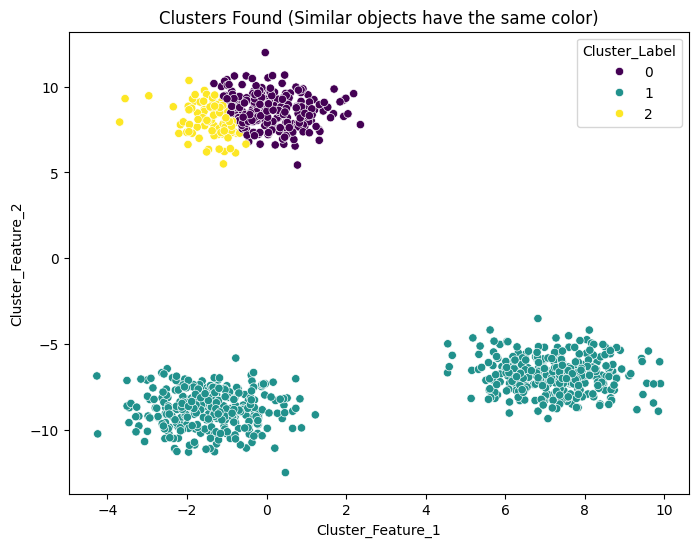

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cluster_Feature_1', y='Cluster_Feature_2', 
                hue='Cluster_Label', data=df, palette='viridis')
plt.title("Clusters Found (Similar objects have the same color)")
plt.show()

### Summary from Lecture Slides:
* **Similarity $\rightarrow$ 0**: If the score is 0, the objects are totally unalike.
* **Dissimilarity $\rightarrow$ 0**: If the distance is 0, the objects are totally the same.
* **Outliers**: If a point is very far from all clusters, it is an outlier.